In [ ]:
# Call prices, we consider for some small positive r, small positive sigma,

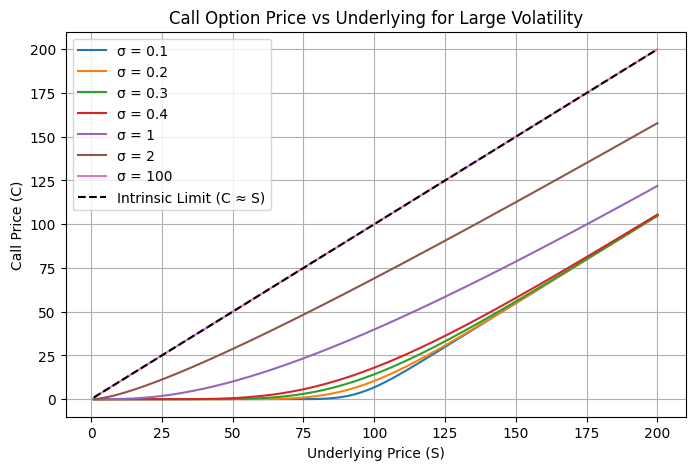

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black–Scholes call price
def call_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Parameters
K = 100
T = 1
r = 0.05
S = np.linspace(1, 200, 4000)
sigmas = [0.1,0.2, 0.3,0.4,1,2,100]

# Plot call prices for different volatilities
plt.figure(figsize=(8,5))
for sigma in sigmas:
    plt.plot(S, call_price(S, K, T, r, sigma), label=f'σ = {sigma}')

plt.plot(S, S, 'k--', label='Intrinsic Limit (C ≈ S)')
plt.title('Call Option Price vs Underlying for Large Volatility')
plt.xlabel('Underlying Price (S)')
plt.ylabel('Call Price (C)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
'''
As sigma increases, note that our call price becomes closer and closer to S_t. This is because a lot less probability in the risk neutral world will have S_T be O(K). 
Convergence to S_T - Ke^{-rT} as for larger S, we are more and more sure of exercising within the money

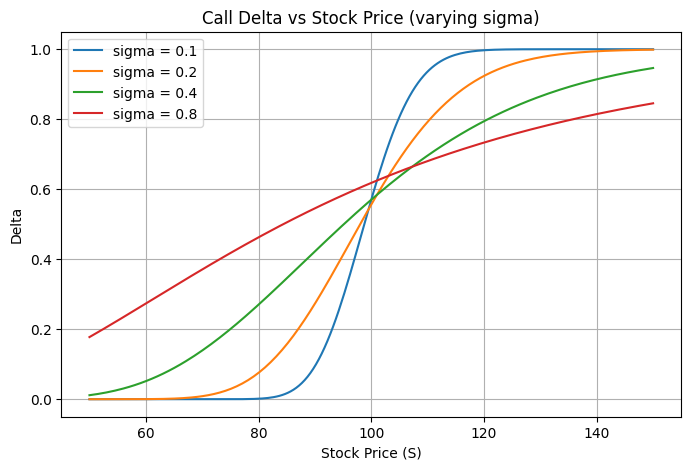

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes call delta
def call_delta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

K = 100
r = 0.02
T = 0.5

S_values = np.linspace(50, 150, 200)
sigma_list = [0.1, 0.2, 0.4, 0.8]

plt.figure(figsize=(8,5))
for sigma in sigma_list:
    delta_vals = [call_delta(S, K, T, r, sigma) for S in S_values]
    plt.plot(S_values, delta_vals, label=f"sigma = {sigma}")

plt.title("Call Delta vs Stock Price (varying sigma)")
plt.xlabel("Stock Price (S)")
plt.ylabel("Delta")
plt.legend()
plt.grid(True)


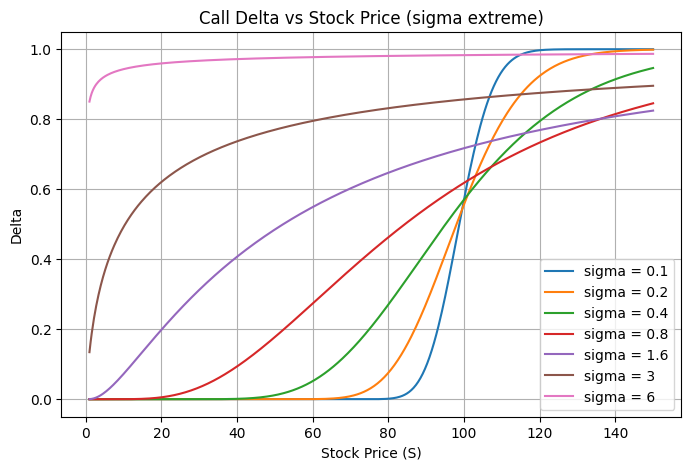

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes call delta
def call_delta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

K = 100
r = 0.02
T = 0.5

S_values = np.linspace(1, 150, 500)
sigma_list = [0.1, 0.2, 0.4, 0.8,1.6,3,6]

plt.figure(figsize=(8,5))
for sigma in sigma_list:
    delta_vals = [call_delta(S, K, T, r, sigma) for S in S_values]
    plt.plot(S_values, delta_vals, label=f"sigma = {sigma}")

plt.title("Call Delta vs Stock Price (sigma extreme)")
plt.xlabel("Stock Price (S)")
plt.ylabel("Delta")
plt.legend()
plt.grid(True)

In [ ]:
'''
Can interpret Delta as 'how much we are currently behaving like the stock' irrespective of what the actual value of the call is. I.e. how few of our results are of O(K) 
exp(-sigma^2/2 + sigma W_t) has heavier tails the larger that sigma is (think that we need W_t > sigma to even keep this expectation at 1, W_t > sigma contributes more and more)
Now as sigma continues to increase, we need smaller and smaller S for which our stock values change such that with high probability, our results behave like O(K).

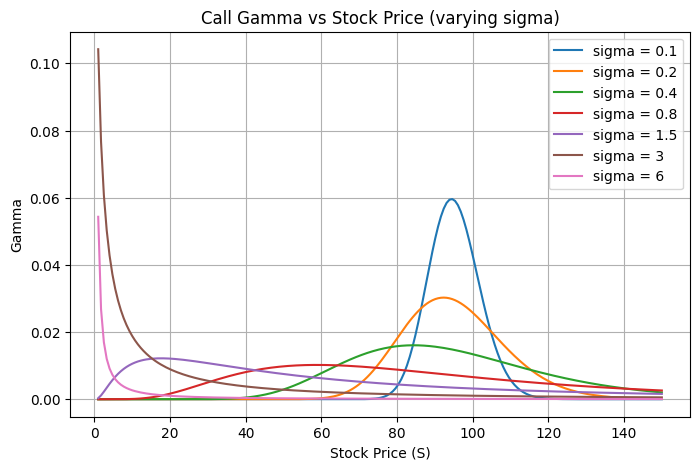

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes call gamma
def call_gamma(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))

K = 100
r = 0.1
T = 0.5

S_values = np.linspace(1, 150, 200)
sigma_list = [0.1, 0.2, 0.4, 0.8,1.5,3,6]

plt.figure(figsize=(8,5))
for sigma in sigma_list:
    gamma_vals = [call_gamma(S, K, T, r, sigma) for S in S_values]
    plt.plot(S_values, gamma_vals, label=f"sigma = {sigma}")

plt.title("Call Gamma vs Stock Price (varying sigma)")
plt.xlabel("Stock Price (S)")
plt.ylabel("Gamma")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
'''
For T 'reasonable', we have that gamma is highest around the money. As sigma increases, we first have we peak to the left. The bigger the gamma, the more we are transitioning from O(K)
The larger the sigma, also the heavier the asymptotic tail.
    
'''